<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L230824.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __실수자료로의 전환(Vectorization)__


머신러닝이란 : Machine learning is about creating models from data

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


x : 데이터, 독립변수, 설명변수(특성변수, feature)

y : 모델 결과 값, 종속변수, 목적변수

x, y 다 제공 -> w, b

w_적절, B_적절 ==> 새로운 x -> 새로운 y 산출

y = x + 1

In [ ]:
type(iris)

pandas.core.frame.DataFrame

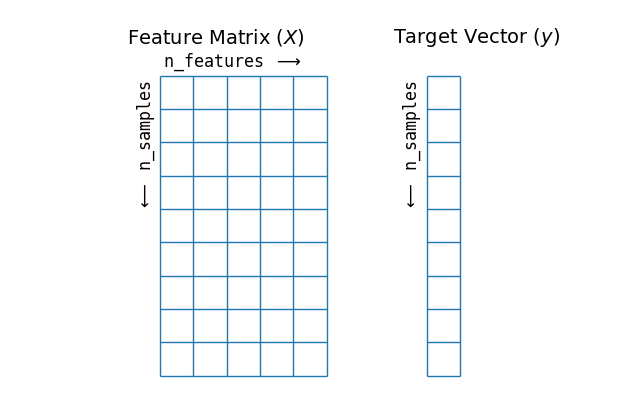

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.axis('equal')

# Draw features matrix
ax.vlines(range(6), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=0, xmax=5, lw=1)
font_prop = dict(size=12, family='monospace')
ax.text(-1, -1, "Feature Matrix ($X$)", size=14)
ax.text(0.1, -0.3, r'n_features $\longrightarrow$', **font_prop)
ax.text(-0.1, 0.1, r'$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop)

# Draw labels vector
ax.vlines(range(8, 10), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=8, xmax=9, lw=1)
ax.text(7, -1, "Target Vector ($y$)", size=14)
ax.text(7.9, 0.1, r'$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop)

ax.set_ylim(10, -2)

fig.savefig('05.02-samples-features.png')

Vectorization : 범주형 자료, 텍스트, 이미지 등을 실수로 되어 있는 [n_samples, n_features] 의 형태로 전환, 새로운 특성변수 생성, 결측자료의 대체

Categorical data = category + categorical codes (<python for data analysis, Wes McKinney>)

category : 구별되는 값을 담고 있다.

categorical code : 구별된 것들의 수량을 표시한 값

In [ ]:
fruits = ['apple', 'orange', 'apple', 'apple']*2

In [ ]:
fruits

['apple', 'orange', 'apple', 'apple', 'apple', 'orange', 'apple', 'apple']

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(fruits)

In [ ]:
df

,0
0,apple
1,orange
2,apple
3,apple
4,apple
5,orange
6,apple
7,apple


In [ ]:
cat_ddf = df[0].astype('category')

In [ ]:
cat_ddf

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: 0, dtype: category
Categories (2, object): ['apple', 'orange']

In [ ]:
cat_ddf.cat.codes

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int8

In [ ]:
cat_ddf.cat.categories

Index(['apple', 'orange'], dtype='object')

In [ ]:
x=[{'city':'seoul','temp':10.0}, {'city':'Dubai', 'temp':33.5}, {'city':'LA','temp':20.0}]
x

[{'city': 'seoul', 'temp': 10.0},
 {'city': 'Dubai', 'temp': 33.5},
 {'city': 'LA', 'temp': 20.0}]

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
vec = DictVectorizer(sparse=False) # 인스턴스 오브젝트 = 클래스(sparse=False)

In [ ]:
vec.fit_transform(x)

array([[ 0. ,  0. ,  1. , 10. ],
       [ 1. ,  0. ,  0. , 33.5],
       [ 0. ,  1. ,  0. , 20. ]])

In [ ]:
vec

DictVectorizer(sparse=False)

In [ ]:
vec_sparse_true = DictVectorizer(sparse=True)

In [ ]:
vec_sparse_true

DictVectorizer()

In [ ]:
x_sparse = vec_sparse_true.fit_transform(x)

In [ ]:
x_sparse

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
print(x_sparse)

  (0, 2)	1.0
  (0, 3)	10.0
  (1, 0)	1.0
  (1, 3)	33.5
  (2, 1)	1.0
  (2, 3)	20.0


In [ ]:
x_sparse.toarray()

array([[ 0. ,  0. ,  1. , 10. ],
       [ 1. ,  0. ,  0. , 33.5],
       [ 0. ,  1. ,  0. , 20. ]])

In [ ]:
D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]

In [ ]:
V = DictVectorizer(sparse=False)

In [ ]:
X = V.fit_transform(D)

In [ ]:
X

array([[2., 0., 1.],
       [0., 1., 3.]])

In [ ]:
V.get_feature_names_out()

array(['bar', 'baz', 'foo'], dtype=object)

In [ ]:
V=DictVectorizer()

In [ ]:
X=V.fit_transform(D)

In [ ]:
X

<2x3 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [ ]:
print(X)

  (0, 0)	2.0
  (0, 2)	1.0
  (1, 1)	1.0
  (1, 2)	3.0


In [ ]:
V.feature_names_

['bar', 'baz', 'foo']

In [ ]:
text=['떴다 떴다 비행기 날아라 날아라',
      '높이 높이 날아라 우리 비행기',
      '내가 만든 비행기 날아라 날아라',
      '멀리 멀리 날아라 우리 비행기']

In [ ]:
text

['떴다 떴다 비행기 날아라 날아라',
 '높이 높이 날아라 우리 비행기',
 '내가 만든 비행기 날아라 날아라',
 '멀리 멀리 날아라 우리 비행기']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vec2 = CountVectorizer()

In [ ]:
tex = vec2.fit_transform(text)

In [ ]:
tex

<4x8 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [ ]:
vec2.get_feature_names_out().tolist()

['날아라', '내가', '높이', '떴다', '만든', '멀리', '비행기', '우리']

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(tex.toarray(), columns=vec2.get_feature_names_out())

In [ ]:
df

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,2,0,0,2,0,0,1,0
1,1,0,2,0,0,0,1,1
2,2,1,0,0,1,0,1,0
3,1,0,0,0,0,2,1,1


is, the, a, an

### TFIDF(Term Frequency Inverse Document Frequency) : 전체 문서에서 출현 비중이 높은 단어에 낮은 가중치를 주고, 반대로 출현 비중이 낮은 단어에는 상대적으로 높은 가중치를 부여 하는 방법

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
x2 = tfidf.fit_transform(text)

In [ ]:
x2

<4x8 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [ ]:
df = pd.DataFrame(x2.toarray(), columns=tfidf.get_feature_names_out())

In [ ]:
df

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,0.450735,0.000000,0.00000,0.86374,0.000000,0.00000,0.225368,0.000000
1,0.229589,0.000000,0.87992,0.00000,0.000000,0.00000,0.229589,0.346869
2,0.569241,0.545415,0.00000,0.00000,0.545415,0.00000,0.284620,0.000000
3,0.229589,0.000000,0.00000,0.00000,0.000000,0.87992,0.229589,0.346869


2. 특성변수의 생성

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 3, 1, 4, 8])

회귀식을 구하겠다.

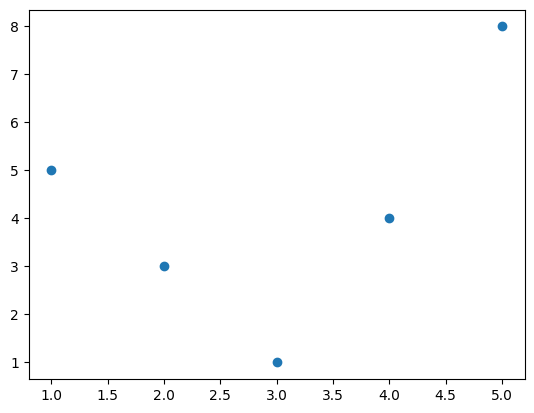

In [ ]:
plt.plot(x, y, 'o')

f(x1 + x2) = f(x1) + f(x2)

f(kx) = kf(x)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3, include_bias = True)

In [ ]:
x1 = poly.fit_transform( x[:, np.newaxis])

In [ ]:
x1

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

In [ ]:
poly.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3'], dtype=object)

In [ ]:
x[:, np.newaxis]

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [ ]:
x

array([1, 2, 3, 4, 5])

In [ ]:
x.reshape(-1, 1)

array([[1],
       [2],
       [3],
       [4],
       [5]])

정규화, 표준화

정규화 : 값의 범위를 [0, 1] 사이로 옮긴다.

$$ x_{nor} = {x -mean(x) \over max(x) - min(x)}$$


표준화 : 어떤 특성의 값들이 정규분포, 즉 종모양의 분포를 따른다고 가정하고 값들을 0의 평균, 1의 표준편차를 갖도록 변환해주는 것입니다. 표준화를 해주면 정규화처럼 특성값의 범위가 0과 1의 범위로 균일하게 바뀌지는 않습니다.

$$ x_{std} = {x - mean(x) \over sd(x)} $$

3. 결측자료의 대체

- 결측치가 있을때, scikit-learn은 작동하지 않으므로 결측치 문제를 해결해야 한다.

- pandas를 이용할 경우, dropna(), fillna() 등을 사용하여 채워 넣기.

- 혹은, 특성변수의 평균, 중위수, 최빈수로 결측치를 대체.

#판단스의 계층 색인

In [ ]:
data = pd.Series(np.random.randn(9), index = [['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                                              [1, 2, 3, 1, 3, 1, 2, 2, 3]])

In [ ]:
data

a  1   -0.728428
   2    0.704475
   3   -1.100231
b  1    1.304302
   3   -1.294587
c  1    0.661683
   2   -1.283402
d  2    0.509813
   3   -1.799748
dtype: float64

In [ ]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [ ]:
data['b']

1    1.304302
3   -1.294587
dtype: float64

In [ ]:
data['b':'c']

b  1    1.304302
   3   -1.294587
c  1    0.661683
   2   -1.283402
dtype: float64

In [ ]:
data.loc[['b', 'c']]

b  1    1.304302
   3   -1.294587
c  1    0.661683
   2   -1.283402
dtype: float64

In [ ]:
data.loc[:, 2]

a    0.704475
c   -1.283402
d    0.509813
dtype: float64

In [ ]:
data

a  1   -0.728428
   2    0.704475
   3   -1.100231
b  1    1.304302
   3   -1.294587
c  1    0.661683
   2   -1.283402
d  2    0.509813
   3   -1.799748
dtype: float64

---
---
---
#주간프로젝트 설명

#주간 프로젝트 날짜

8월 25일, 9월 1일, 9월 7일, 9월 13일, 9월 21일 ~ 10월 4일

10월 4일 발표 예정

---

#포트폴리오 목차

프로젝트 개요

    - 프로젝트 기획 배경 및 목표
        1. 배경 및 사전 조사 (가능한 데이터/분석방법/결과 위주로 작성)

        2. 목표 (간략히)

    - 구성원 및 역활

프로젝트 수행 절차 및 방법

수행 결과 및 기대효과

    - 프로젝트 개발 기술 고도화

        1. Streamlit multipage (class, 아래 내용 참조)
            - multipage를 생성하는 클래스의 diagram

	    2. 시계열 자료 처리 (아래 내용 참조)
            - QC (결과 그래프, Gap Filling)
            - 기초통계 (1시간, 3시간, 8시간, 1일) 평균값 산출

	- 프로젝트 diagram
        1. 데이터 수집
        2. 데이터 저장
        3. 데이터 처리 및 분석
        4. 데이터 표출

	- 처리 및 분석한 내용

    - 인사이트 도출

    - 향후 개선 사항 및 기대효과

개발후기 및 느낀점

---

모든 산출물은 포트폴리오 ppt 뿐만 아니라, streamlit 웹페이지에도

표출 되어 있어야 함


### app.py의 page 표출 코드를 클래스로 작성

아래 그림에서 8번째 줄 부터 끝까지의 내용을 클래스로 대체

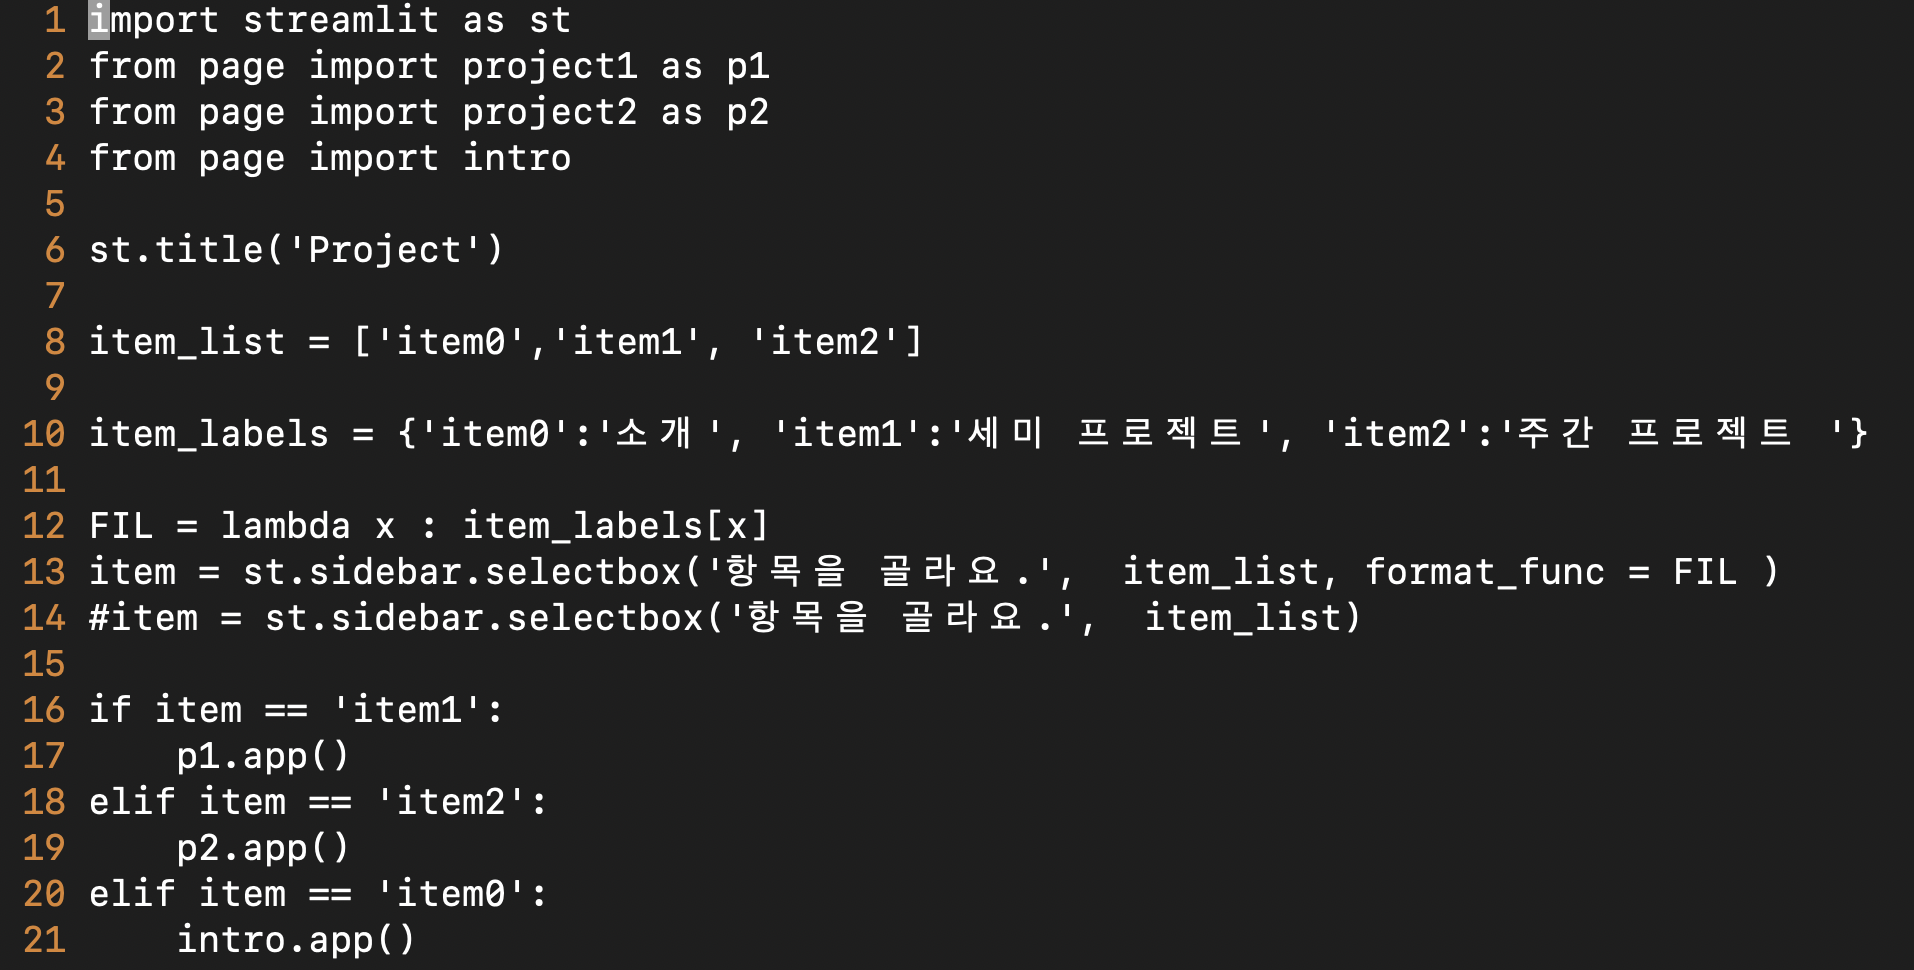

#예제 시계열 자료

다운 받는 곳 : https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36

    자료 형태 : 분자료
    지점 : 서울특별시 > 서울(108)
    자료 : 기온

상기 사이트에서 20일치이상 기온 자료 다운로드 하여 분석에 사용

QC : 별도 표 참조

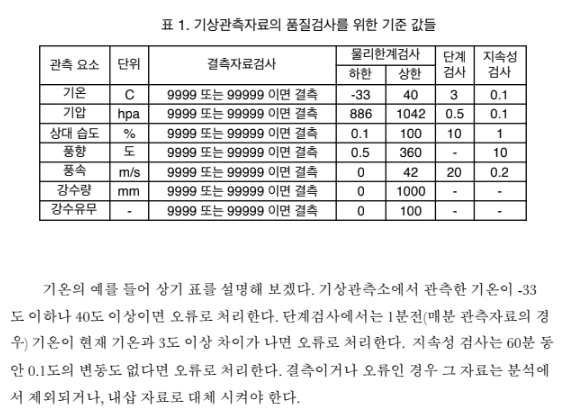

- QC 단계
    1. 결측 검사 : 기온 결측 자료는 np.nan으로 채워 넣는다.
    2. 물리 한계 검사
    3. 단계검사 : [현재기온 - 1분전 기온] 을 사용, 현재 기온을 오류 처리
    4. 지속성 검사 : 단계검사에서 산출한 값의 절대값을 사용하여 시간별로 60개씩 합한 값을 구한다. 합계 한 값이 0.1보다 작으면 60개 전부 오류 처리

    5. 오류는 모두  np.nan을 의미



In [ ]:
cat OBS_ASOS_MI_20230824142502.csv

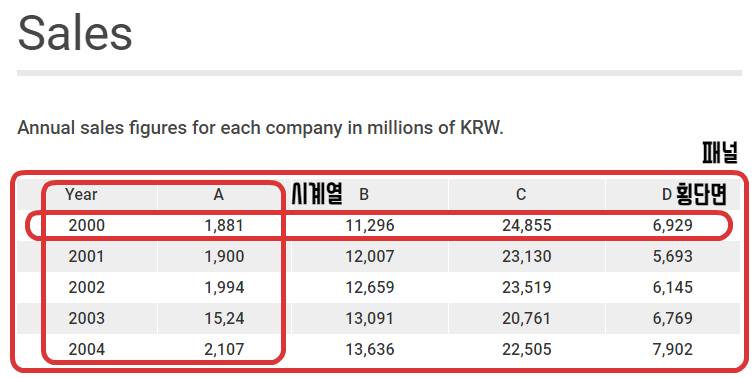

----
----
----

In [ ]:
data

a  1   -0.728428
   2    0.704475
   3   -1.100231
b  1    1.304302
   3   -1.294587
c  1    0.661683
   2   -1.283402
d  2    0.509813
   3   -1.799748
dtype: float64

In [ ]:
data.unstack()

,1,2,3
a,-0.728428,0.704475,-1.100231
b,1.304302,NaN,-1.294587
c,0.661683,-1.283402,NaN
d,NaN,0.509813,-1.799748


In [ ]:
data.unstack().stack()

a  1   -0.728428
   2    0.704475
   3   -1.100231
b  1    1.304302
   3   -1.294587
c  1    0.661683
   2   -1.283402
d  2    0.509813
   3   -1.799748
dtype: float64

In [ ]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])

In [ ]:
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [ ]:
frame.index.names = ['key1', 'key2']

In [ ]:
frame.columns.names = ['state', 'color']

In [ ]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [ ]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [ ]:
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [ ]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [ ]:
frame.sort_index(level=1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [ ]:
frame.sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [ ]:
frame.swaplevel(0, 1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

In [ ]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [ ]:
frame.sum(level='key2')

<ipython-input-102-f3eb061baf48>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  frame.sum(level='key2')


state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [ ]:
frame.sum(level='color', axis=1)

<ipython-input-103-7f534aeea1c3>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  frame.sum(level='color', axis=1)


color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

In [ ]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [ ]:
df1 = pd.DataFrame({'key':['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1':range(7)})

In [ ]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [ ]:
df2 = pd.DataFrame({'key':['a', 'b', 'd'],
                    'data2':range(3)})

In [ ]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [ ]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [ ]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [ ]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})

In [ ]:
df3

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [ ]:
df4

,rkey,data2
0,a,0
1,b,1
2,d,2


In [ ]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [ ]:
pd.merge(df1, df2, how='outer') # outer : 합집합

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})

In [ ]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [ ]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [ ]:
pd.merge(df1, df2, on='key', how='left') # df1 : b가 3개, df2 : b가 2개, 3*2 = 6

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [ ]:
pd.merge(df1, df2, how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [ ]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})

In [ ]:
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [ ]:
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [ ]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [ ]:
pd.merge(left, right, on='key1') # foo 2, foo 2 2*2 = 4, bar 1, bar 2 1*2 = 2

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [ ]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [ ]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [ ]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [ ]:
right1

,group_val
a,3.5
b,7.0


In [ ]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [ ]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [ ]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'],
                      'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                              'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])
lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [ ]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [ ]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [ ]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True, how='outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [ ]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])

In [ ]:
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [ ]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [ ]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


#축따라 이어 붙이기

In [ ]:
arr = np.arange(12).reshape((3, 4))

In [ ]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [ ]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [ ]:
s1

a    0
b    1
dtype: int64

In [ ]:
s2

c    2
d    3
e    4
dtype: int64

In [ ]:
s3

f    5
g    6
dtype: int64

In [ ]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [ ]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [ ]:
s4 = pd.concat([s1, s3])

In [ ]:
s4

a    0
b    1
f    5
g    6
dtype: int64

In [ ]:
pd.concat([s1, s4], axis=1)

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [ ]:
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,1


In [ ]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])

In [ ]:
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [ ]:
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [ ]:
pd.concat([s1, s1, s3], keys=['one', 'two', 'three'], axis=1)

,one,two,three
a,0.0,0.0,NaN
b,1.0,1.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0
